In [1]:
import yfinance as yf

# Download data for a specific stock (e.g., Apple)
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
data.to_csv('AAPL_stock_data.csv')


[*********************100%***********************]  1 of 1 completed


In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load data
data = pd.read_csv('AAPL_stock_data.csv')

# Select features for modeling
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(features)


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Create sequences of stock data
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Build LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Predict the closing price

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [4]:
from sklearn.model_selection import train_test_split

# Prepare dataset
X, Y = create_dataset(scaled_data, time_step=60)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape data to fit LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and train model
model = build_lstm_model((X_train.shape[1], 1))
model.fit(X_train, Y_train, epochs=100, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 0.0240
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0013
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0011
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 9.3129e-04
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0010
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0010
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 9.3553e-04
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.6381e-04
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 8.5359e-04
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 8.5429e-04
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.5335e-04
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.3791e-04
Epoch 13/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 6.1143e-04
Epoch 14/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.7075e-04
Epoch 15/100
49/49 ━

In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

predicted_stock_price = model.predict(X_test)
mse = mean_squared_error(Y_test, predicted_stock_price)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Root Mean Squared Error: 0.024787611886233376


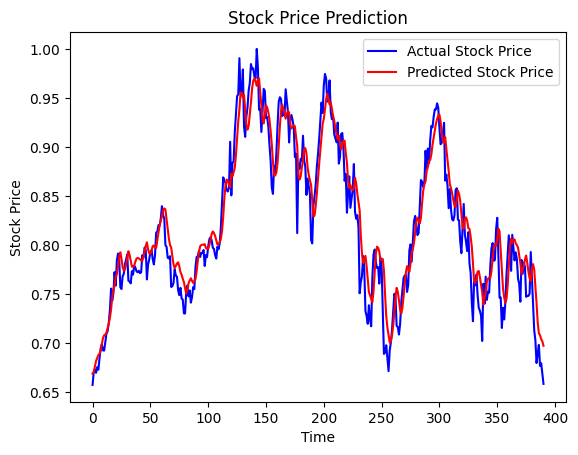

In [6]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.plot(Y_test, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
